# US Visa Approval Project

**Life cycle of Machine Project**

* Understanding problem statement
* Data Collection
* Exploratory Data Analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model


### About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. 

The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## 1) Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. 
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

### About Dataset
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* `case_id`: ID of each visa application
* `continent`: Information of continent the employee
* `education_of_employee`: Information of education of the employee
* `has_job_experience`: Does the employee has any job experience? Y= Yes; N = No
* `requires_job_training`: Does the employee require any job training? Y = Yes; N = No
* `no_of_employees`: Number of employees in the employer's company
* `yr_of_estab`: Year in which the employer's company was established
* `region_of_employment`: Information of foreign worker's intended region of employment in the US.
* `prevailing_wage`: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* `unit_of_wage`: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* `full_time_position`: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* `case_status`: Flag indicating if the Visa was certified or denied

### 2.1 Import Data and required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

**Importing data**

In [2]:
df = pd.read_csv(r"dataset/EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of Dataset**

In [4]:
df.shape

(25480, 12)

**Summary of Dataset**

In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Checking Datatype**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## 3 Exploring Dataset

In [9]:
# Defining Numerical and Categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print names 
print(f"Numerical features   :{len(numerical_features)} {numerical_features}")
print(f"Categorical features :{len(categorical_features)} {categorical_features}")

Numerical features   :3 ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Categorical features :9 ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [12]:
# proportion of value counts in categorical features
for feature in categorical_features:
    print(f"{df[feature].value_counts(normalize=True)}")
    print("------------------------------------------------------")
          

case_id
EZYV01       0.000039
EZYV16995    0.000039
EZYV16993    0.000039
EZYV16992    0.000039
EZYV16991    0.000039
               ...   
EZYV8492     0.000039
EZYV8491     0.000039
EZYV8490     0.000039
EZYV8489     0.000039
EZYV25480    0.000039
Name: proportion, Length: 25480, dtype: float64
------------------------------------------------------
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
------------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
------------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
------------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Na

**Insights**
* `case_id` is unique columns so it can be drop
* `continent` feature is baised toward Asia
* `unit_of_wage` is of yearly based

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

## Numerical Features

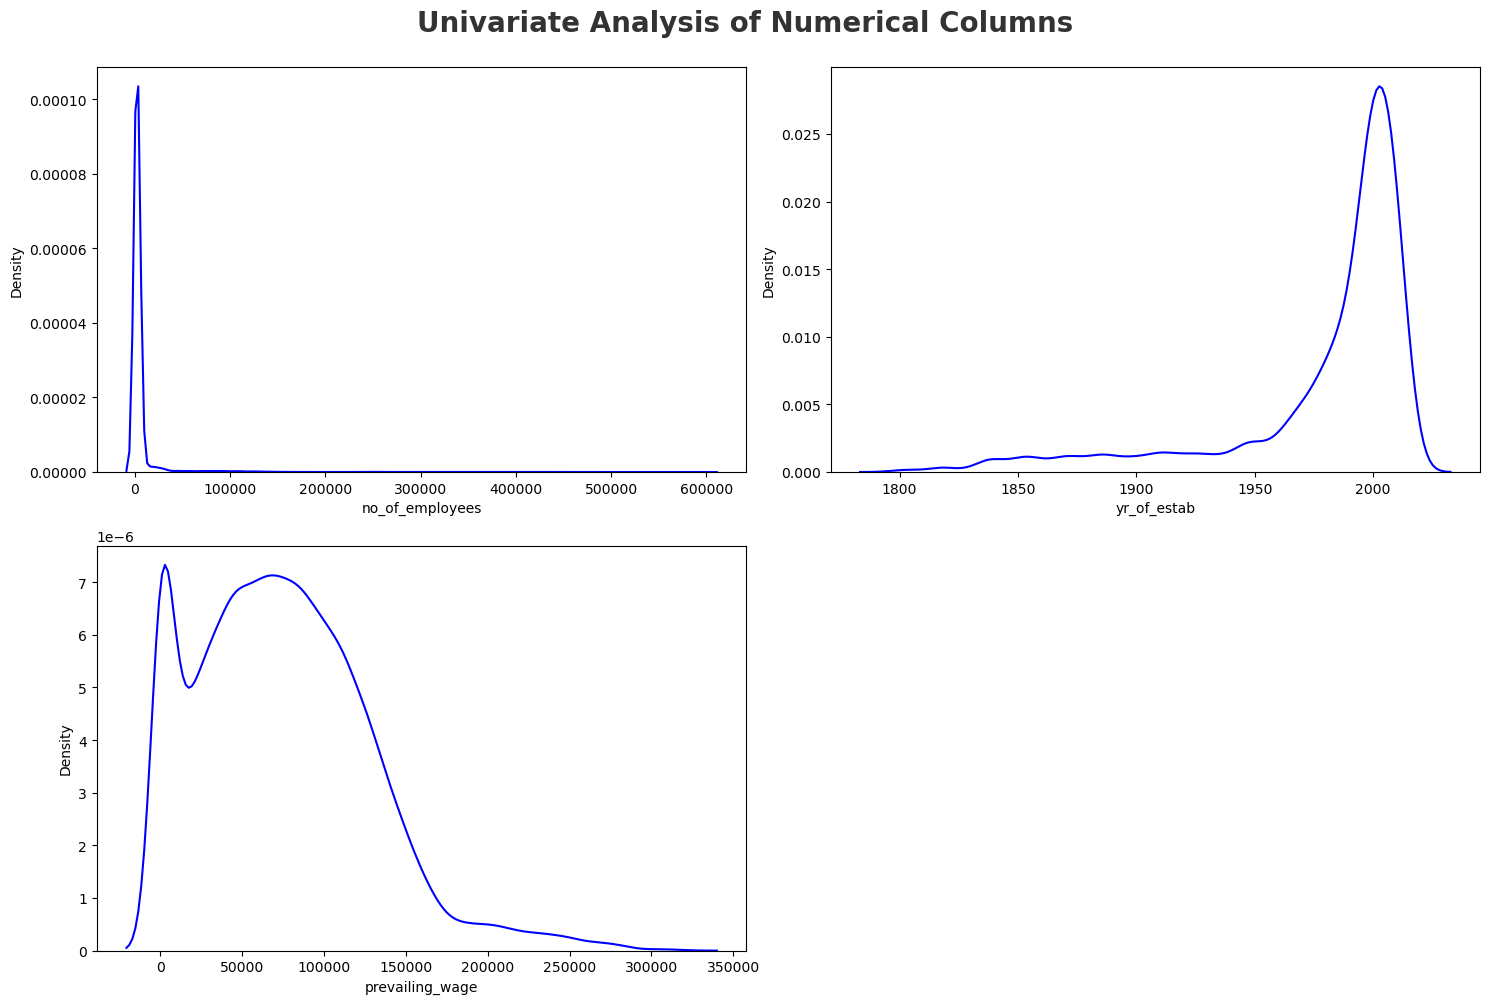

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Columns',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x= df[numerical_features[i]],color ='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Categorical Features

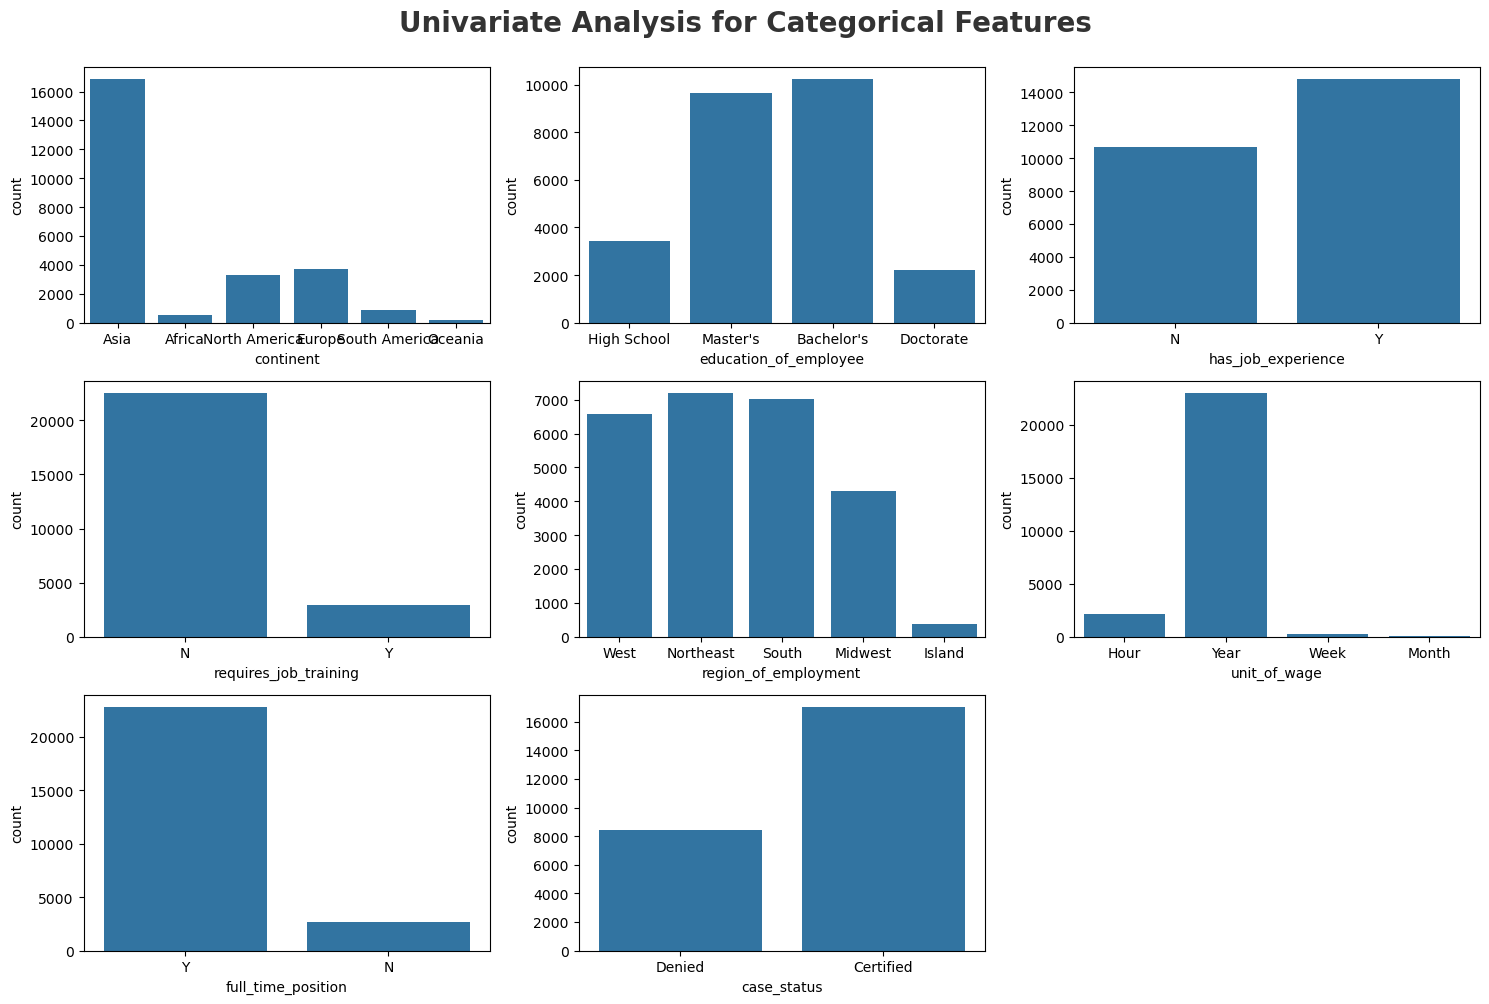

In [22]:
# categorical Features
#categorical_features.remove('case_id')
plt.figure(figsize =(15,10))
plt.suptitle('Univariate Analysis for Categorical Features',fontsize =20,fontweight='bold',alpha = 0.8,y =1.)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

#save plot
#plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` coulmns have signle category dominating.
 - In rest of the columns are balanced.

## Multivariate Analysis
analysis of more than one variable

In [25]:
contineous_features = [feature for feature in numerical_features if df[feature].nunique() > 25]
discrete_features = [feature for feature in numerical_features if df[feature].nunique() <= 25 ]

print(f"Contineous features :  {contineous_features}")
print(f"Discreate features  :  {discrete_features}")

Contineous features :  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Discreate features  :  []


## Check for Multicolinearity between Numerical features

In [26]:
df[numerical_features].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Insights**
* NO multicoliearity seen

## Check for Multicolinearity between Categorical Features

* **A chi-squared test** (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [34]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data = [categorical_features,chi2_test]).T
result.columns = ['Features','Hypothesis Result']
result

,Features,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Insights**
* Except `requires_job_training` every feature is corrleated to output feature

## Checking Null values

In [37]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Distribution of Contineous Numerical Features

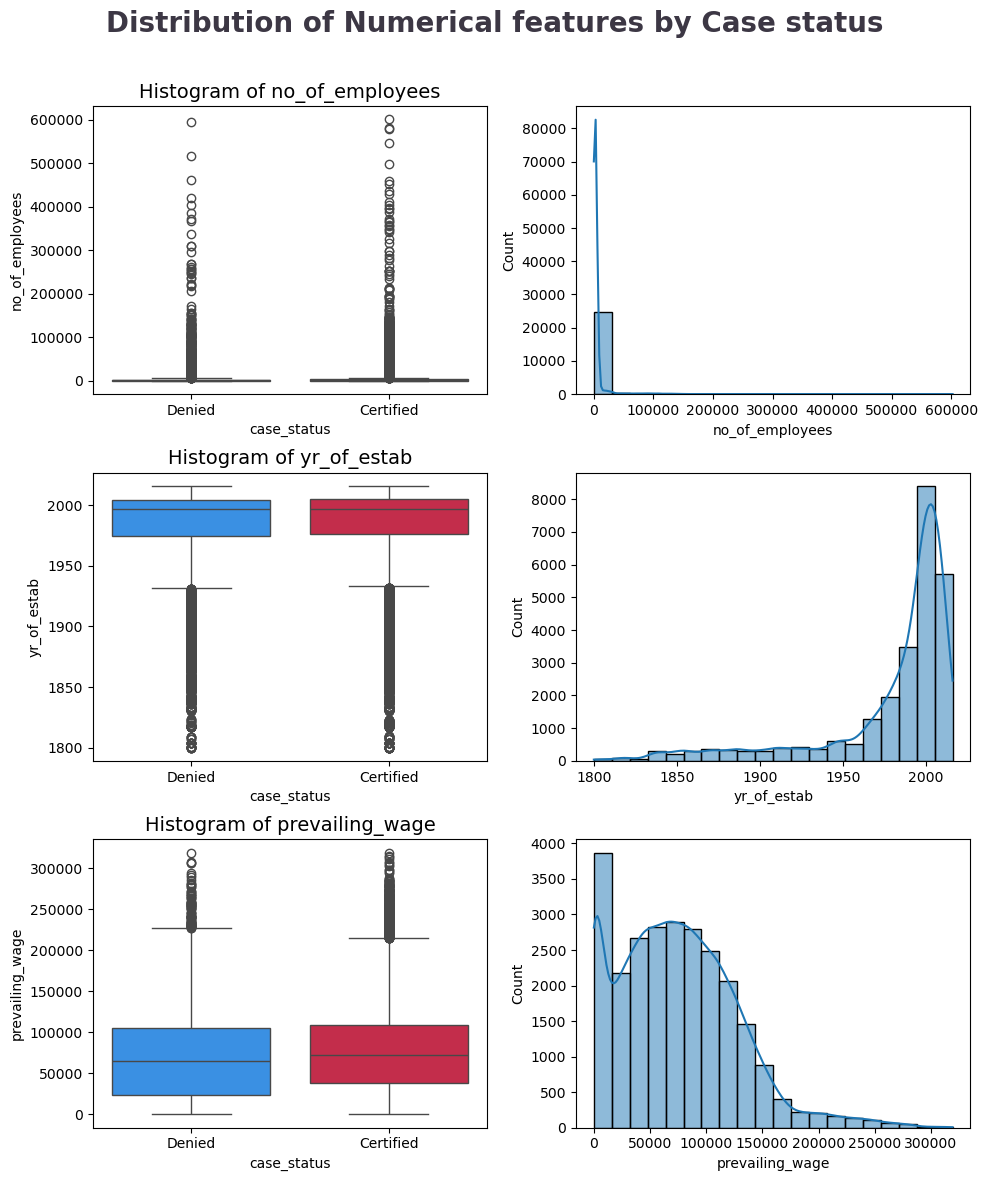

In [39]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3,2,figsize = (10,12))
fig.suptitle('Distribution of Numerical features by Case status', color = '#3C3744',fontsize = 20,fontweight='bold',ha='center')
for i ,col in enumerate(contineous_features):
    sns.boxplot(data=df, x='case_status',y= col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)
    sns.histplot(data=df,x=col,bins=20,kde=True,multiple ='stack',palette=clr1,ax=ax[i,1])
    ax[i,0].set_title(f'Histogram of {col}',fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig(images/multivariate_num.png')

## Initial Analysis Report

* `no_of_employees` has many outliers which can be Handled in Feature Engineering and `no_of_employees` is Right Skewed.
* `yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.
* `prevailing_wage` is right skewed with outliers above upper bound of box plot.
* There are No missing values in the dataset.
* The `case_id` column can be deleted because each row has unique values.
* The `case_status` column is the target to predict.
* In the Categorical column, features can be made Binary numerical in feature Encoding

## 4 Visualization

### 4.1 Visualizing Target feature

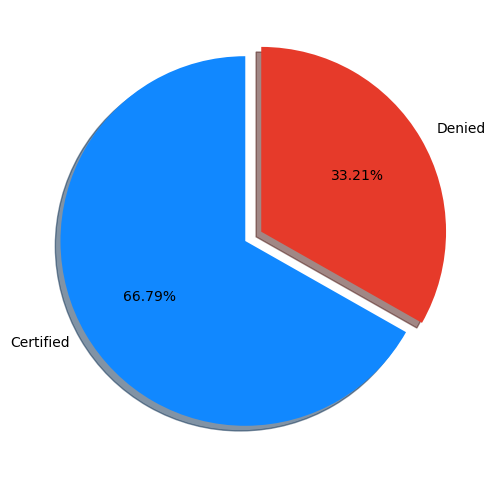

In [42]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(10, 6))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

From the chart it is seen that the Target Variable is Imbalanced 

What is imbalanced data?
Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

### 4.2 Does applicant's continent has any impact on visa status ?

In [43]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

In [50]:
## plotting graph of continent vs visa status

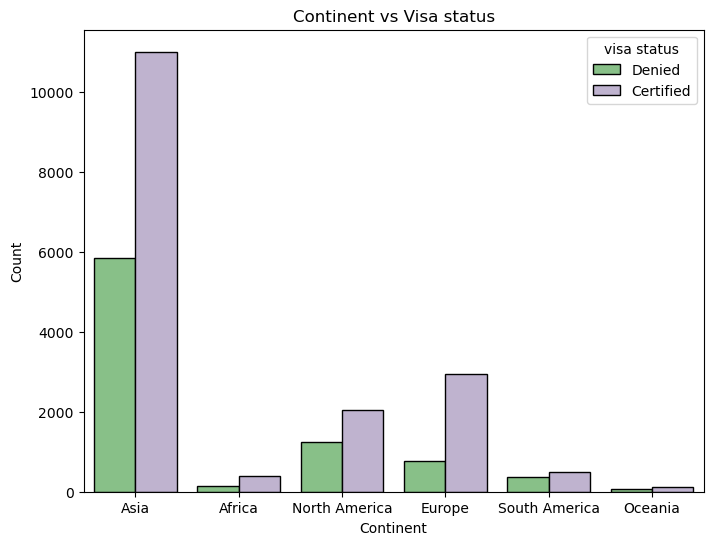

In [49]:
plt.subplots(figsize=(8,6))
sns.countplot(x = 'continent',hue='case_status',data=df,palette='Accent',ec='black')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Continent vs Visa status')
plt.legend(title='visa status')
plt.show()

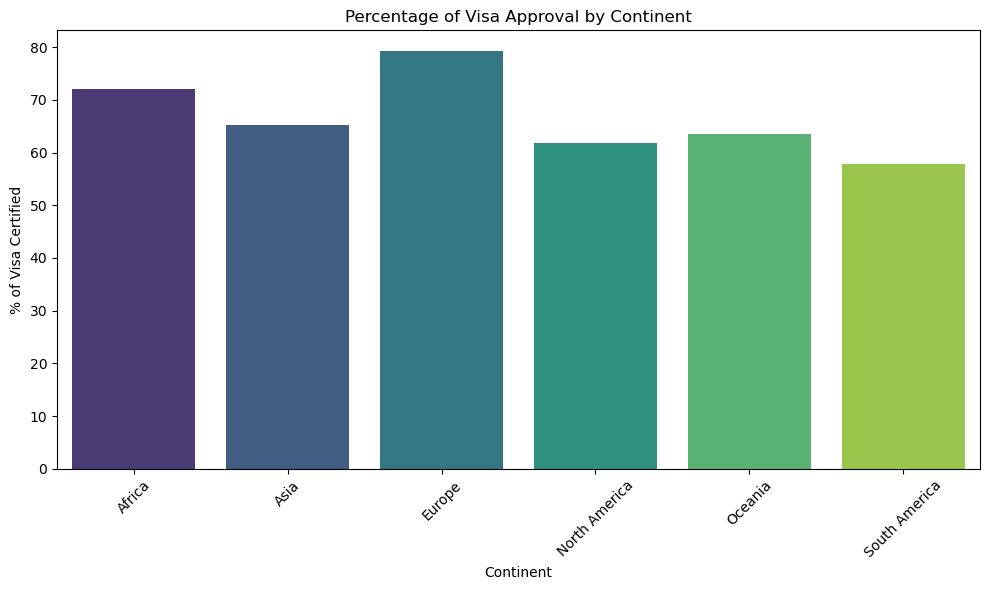

In [90]:
certified_percentage = df[df['case_status']=='Certified'].groupby('continent').size()/df.groupby('continent').size()*100
plt.figure(figsize = (10,6))
sns.barplot(x=certified_percentage.index,y=certified_percentage.values,palette ='viridis',capsize=1)
plt.title('Percentage of Visa Approval by Continent')
plt.xlabel('Continent')
plt.ylabel('% of Visa Certified')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

**Report:**

* As per the Chart Asia applicants applied more than other continents.
* 43% of Certified applications are from Asia.
* This is followed by Europe with 11% of Certified applications.
* Highest chance of getting certified if you are from Europe and followed by Africa

### 4.3 Does applicant education have any impact on approval

In [91]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [92]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

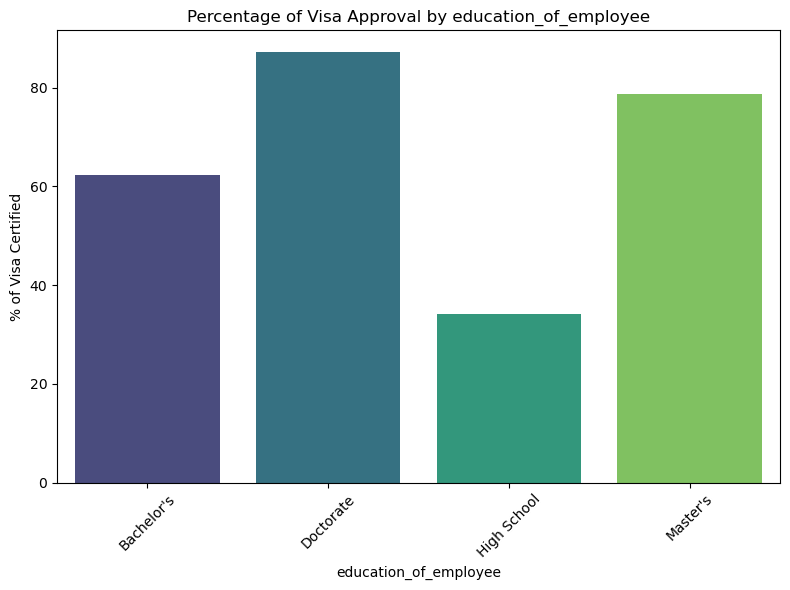

In [94]:
certified_percentage = df[df['case_status']=='Certified'].groupby('education_of_employee').size()/df.groupby('education_of_employee').size()*100
plt.figure(figsize = (8,6))
sns.barplot(x=certified_percentage.index,y=certified_percentage.values,palette ='viridis',capsize=1)
plt.title('Percentage of Visa Approval by education_of_employee')
plt.xlabel('education_of_employee')
plt.ylabel('% of Visa Certified')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

### 4.4 Does applicant's previous work experience have any impact ?

In [3]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize = True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

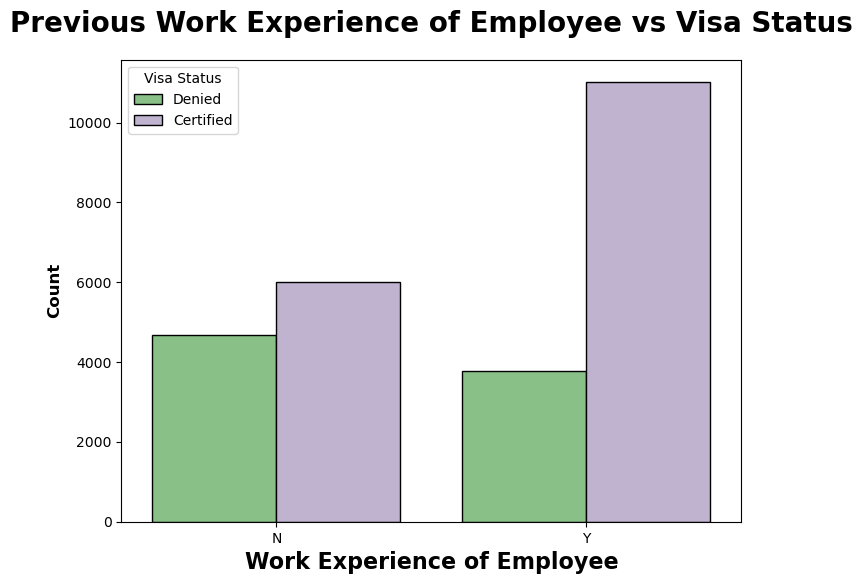

In [6]:
plt.subplots(figsize=(8,6))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

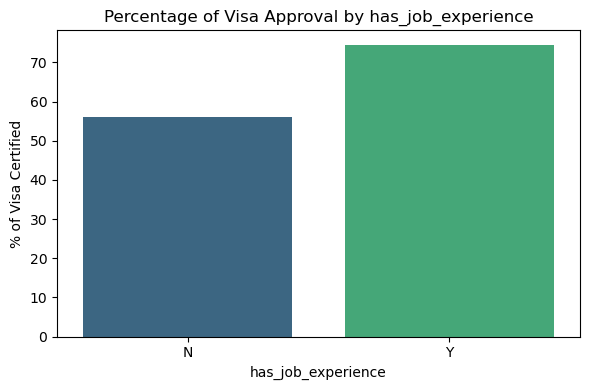

In [9]:
certified_percentage = df[df['case_status']=='Certified'].groupby('has_job_experience').size()/df.groupby('has_job_experience').size()*100
plt.figure(figsize = (6,4))
sns.barplot(x=certified_percentage.index,y=certified_percentage.values,palette ='viridis',capsize=1)
plt.title('Percentage of Visa Approval by has_job_experience')
plt.xlabel('has_job_experience')
plt.ylabel('% of Visa Certified')
plt.tight_layout()
plt.show()

**Report**
* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means work experience has effect on Visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

### 4.5 Does the applicant's job training has impact on visa approval ?

In [11]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

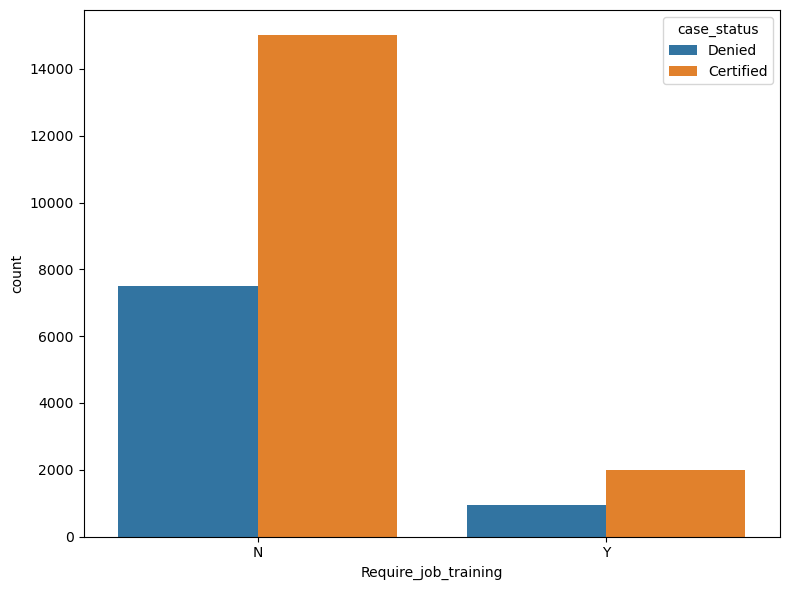

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['requires_job_training'],hue=df['case_status'])
plt.xlabel('Require_job_training')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [17]:
df2= df.copy()

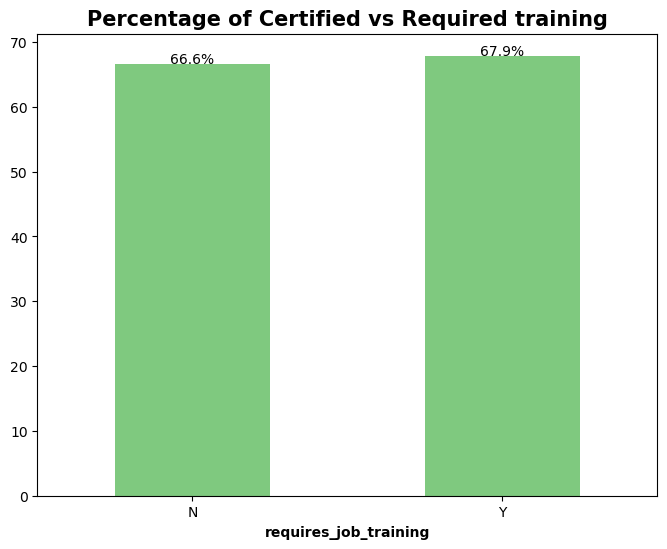

In [18]:
plt.figure(figsize=[8,6])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* If employee requires job training and it doesn't have any effect on Visa status.
* 88% of applicant don't require job training. 
* 63% of people who doesnt want job training got certified.
* For employees who require job training 67% of people get certified.
* As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

### 4.6 Does the number of employees has any impact on visa status ?

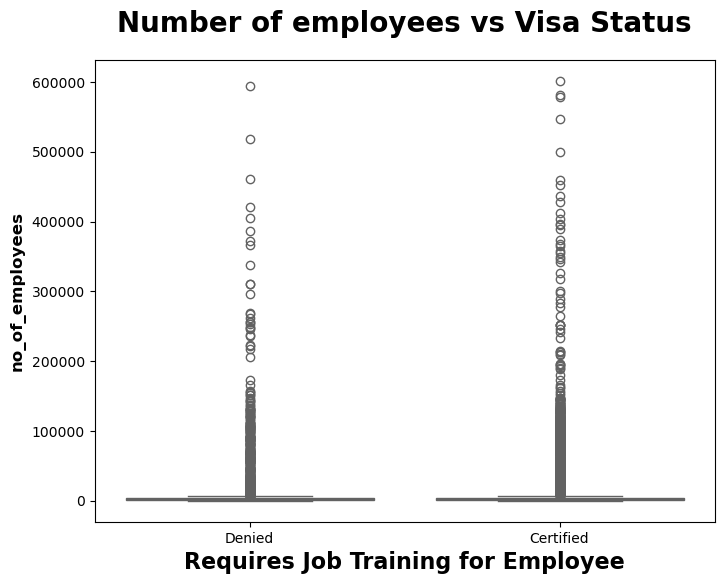

In [21]:
plt.subplots(figsize=(8,6))
sns.boxplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("no_of_employees", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Insights**
 - The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

### 4.7 Wages impact on visa status ?

In [23]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

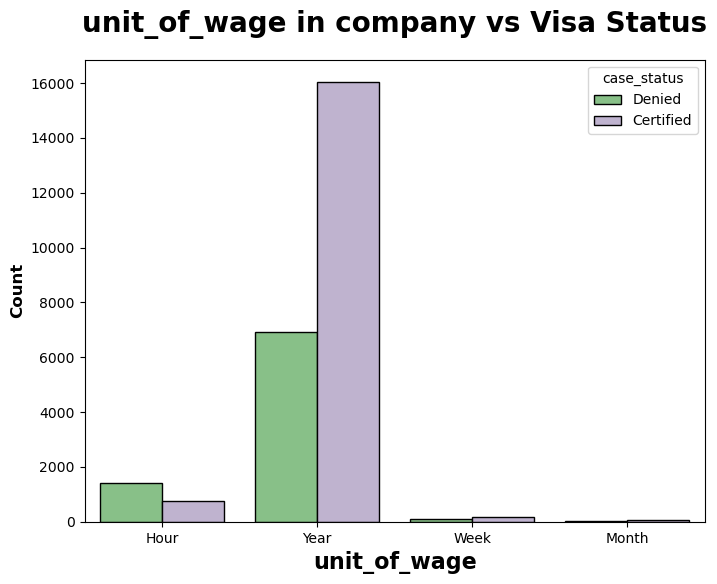

In [26]:
plt.subplots(figsize=(8,6))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("unit_of_wage in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("unit_of_wage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

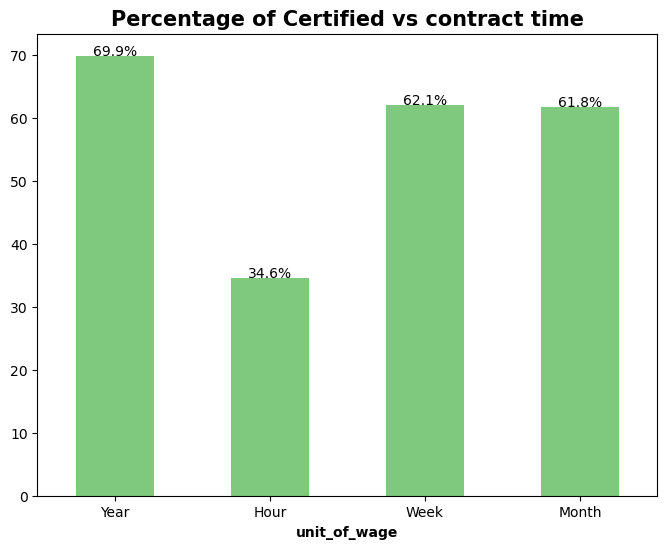

In [27]:
plt.figure(figsize=[8,6])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

### 4.7 Does Region of employment has impact on Visa status ?

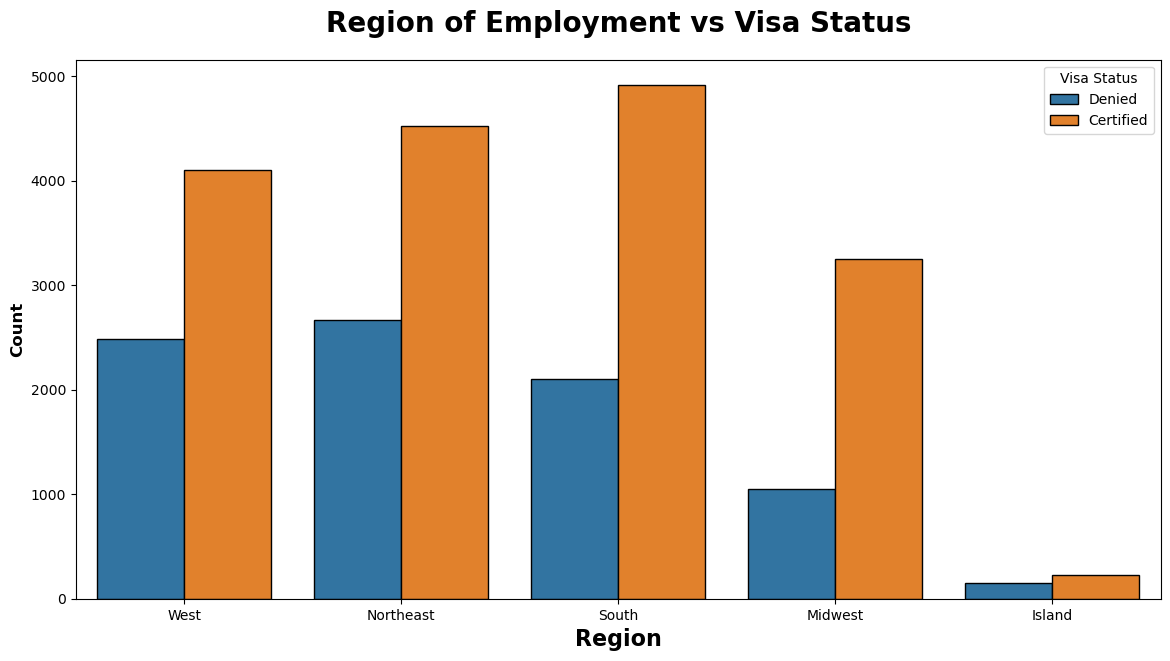

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

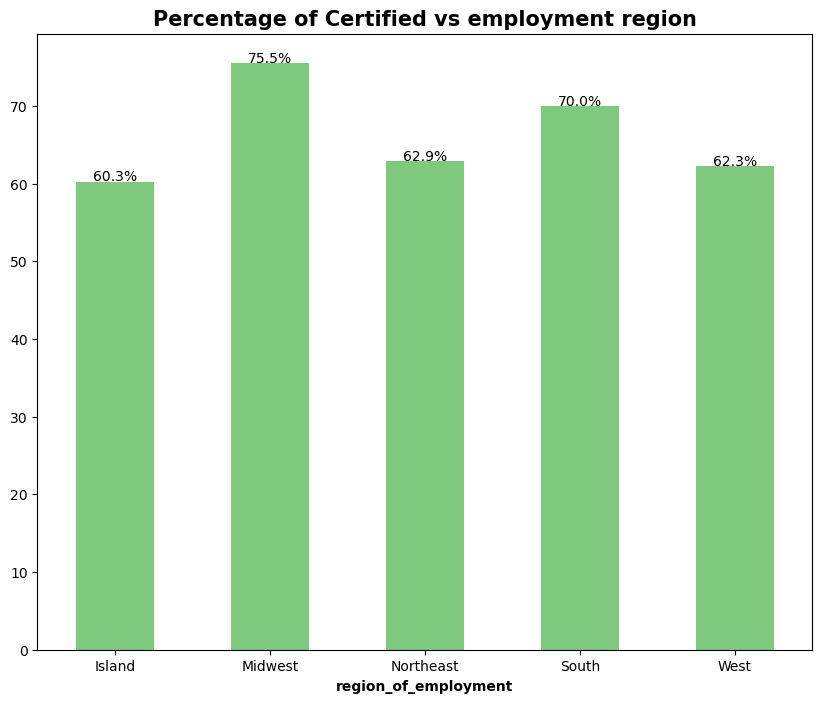

In [30]:
plt.figure(figsize=[10,8])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report** 
* As per chart all the region have very similar pattern of getting Visa certified and Denied.
* There is a slight edge for `midwest` followed by `South` region

### 4.8 Does Prevailing wage has any impact on Visa status ?

In [32]:
df.groupby('prevailing_wage').case_status.value_counts().to_frame()

,,count
prevailing_wage,case_status,
2.1367,Certified,1
2.9561,Denied,1
3.0031,Denied,1
3.3188,Denied,1
3.4889,Certified,1
...,...,...
311734.4900,Certified,1
314156.0600,Certified,1
315497.6000,Certified,1


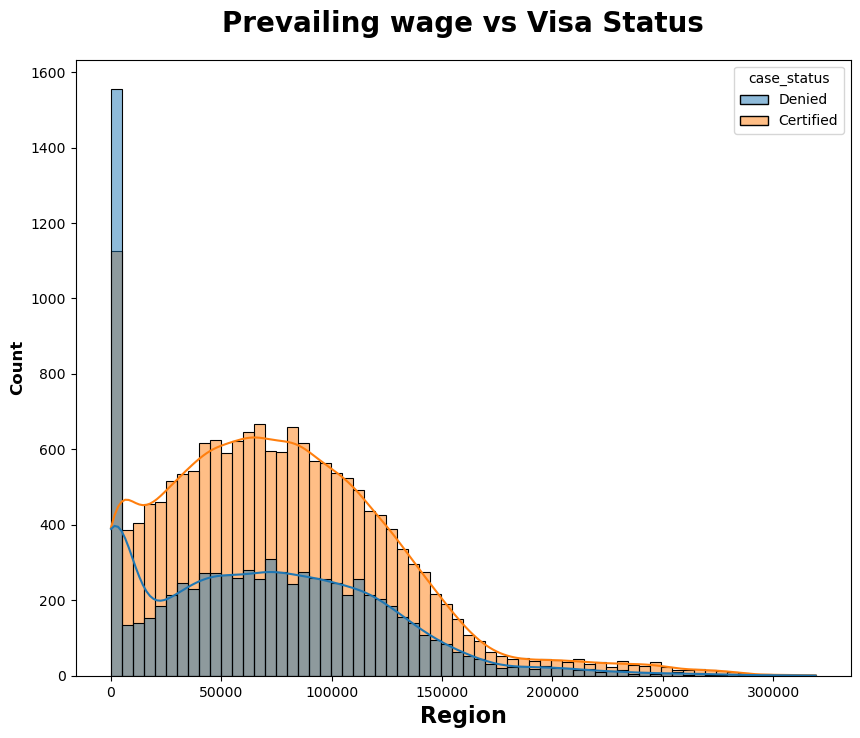

In [33]:
plt.subplots(figsize=(10,8))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
 - The distribution of both the classes are same but need to handel the outliers.

#### 4.8.1 Prevailing wage based on Education

In [34]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


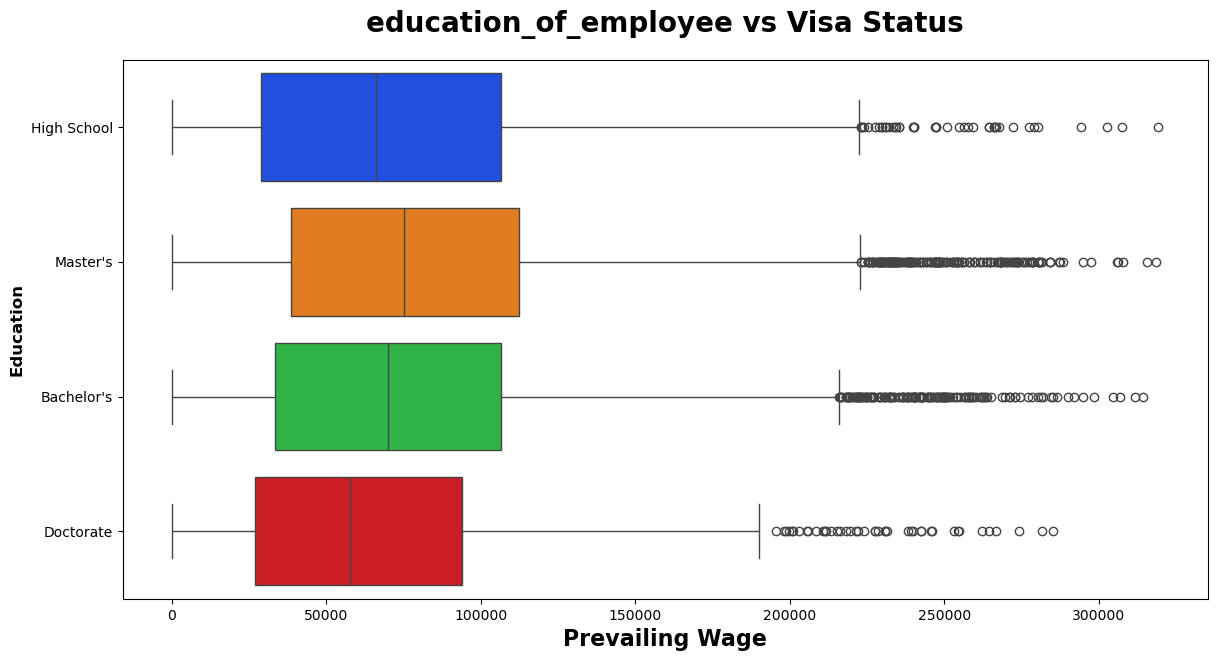

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

**Report**
* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

#### 4.8.2 Prevailing wage based on Job experience

In [36]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


**Report**
* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD.

#### 4.8.3 Prevailing wage based on Continent

In [37]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


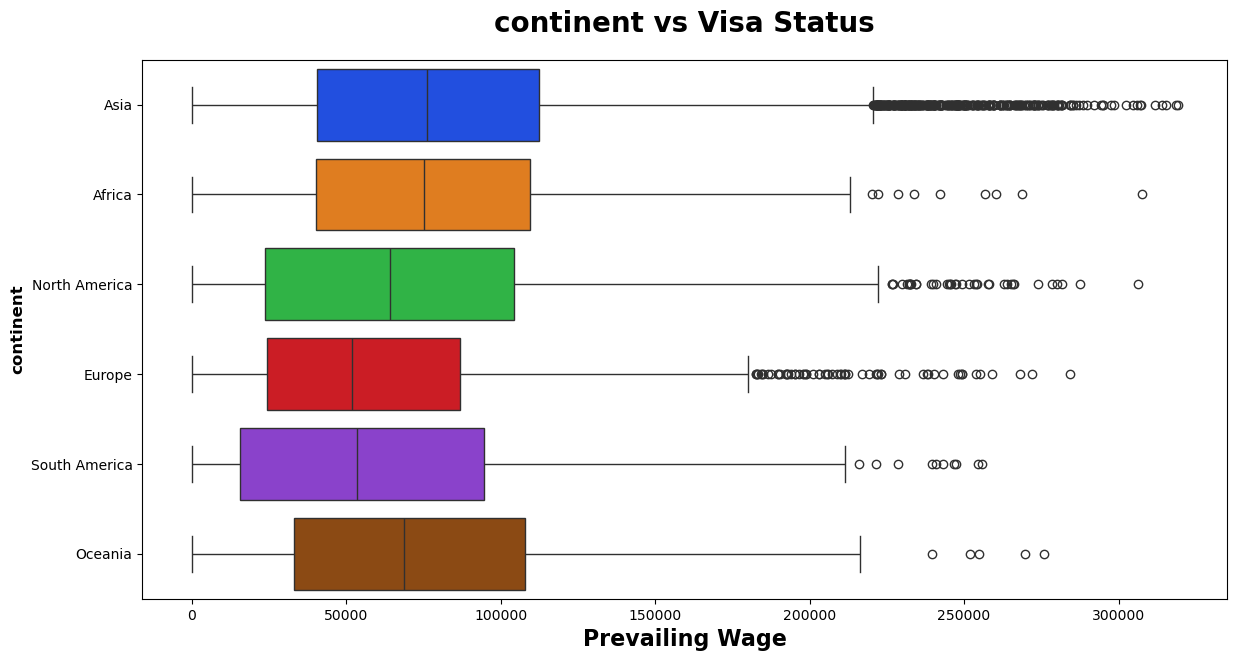

In [38]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

**Report**
* Average salary of people from Asia is higher than other continents.

### 4.9 Year of Establishment 

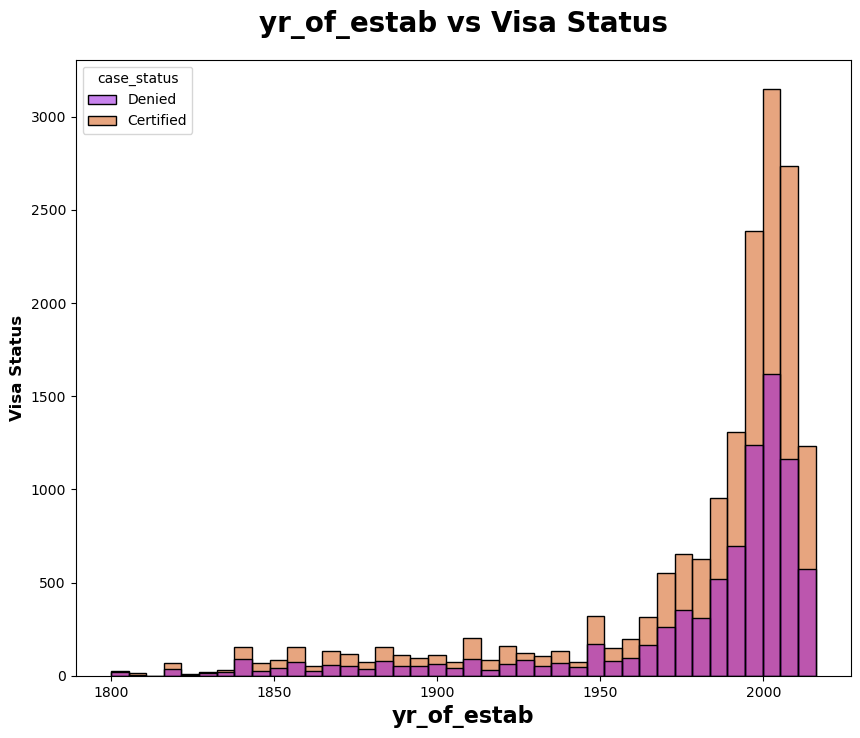

In [42]:
plt.subplots(figsize=(10,8))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Visa Status", weight="bold", fontsize=12)
plt.show()

**Report**
* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.